In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import glob
from radioReduction import *
from astropy.stats import LombScargle

In [2]:
'''
Gathering the data
'''
# Reading all the average flux densities data tbales
dir = '1314/'
folder = glob.glob('1314/*-LLRR.dat')

# reading in the data tables
dt = []
for i in range(len(folder)):
    dt.append(pd.read_table(folder[i]))

# Calculating the means and uncert
mjd,re,ure = [],[],[]

for i in range(len(dt)):
        m,f,e = meanData(dt[i])
        mjd.append(m)
        re.append(f)
        ure.append(e)
    

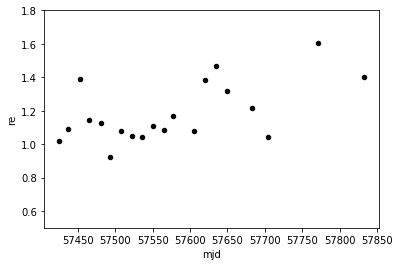

In [5]:
longTerm = pd.DataFrame(data={'mjd':mjd,'re':re,'ure':ure})
longTerm.plot.scatter('mjd','re',yerr='ure',color='black')
plt.ylim(0.5,1.8)
plt.show()

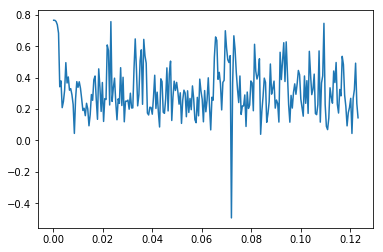

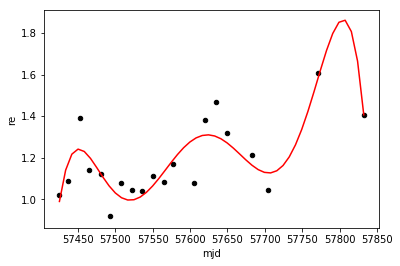

In [32]:
freq, power = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).autopower()
plt.plot(freq,power)
plt.show()
best_freq = freq[np.argmax(power)]
x_fit = np.linspace(np.min(longTerm['mjd']),np.max(longTerm['mjd']))
y_fit = LombScargle(longTerm['mjd'],longTerm['re'],longTerm['ure'],nterms=3).model(x_fit,best_freq)

longTerm.plot.scatter('mjd','re',yerr='ure',color='black')
plt.plot(x_fit,y_fit,color='red')
plt.show()

In [30]:
arr = np.array([freq,power])
np.argmax(arr[1])
arr.shape

(2, 251)